#### INFO7390 Adv Data Sci  
## **Assignment 1 ML Model**  
    
Name: Fangqing Wu  
NUID: 001305642

---
**License**  
This project is licensed under [MIT License](https://raw.githubusercontent.com/fwqfwq/dataset/master/MIT%20License),  
all credits to Fangiqng Wu. 
\
\
**Links**  
Google Colab: https://colab.research.google.com/drive/1__rqOgw6eklBUiDkBMXswGTP_Dip2BPd?usp=sharing   
Dataset: https://www.kaggle.com/divyansh22/february-flight-delay-prediction  








---
### **Abstract**  
This project is about the prediciton on February flight dataset.   
The dataset is based on the two part of data from Feb 2019 and Feb 2020 , which are meant to share the same periodical pettern.   
Three different models would be used for prediction (Linear Regression, Random Forests), after cleaning and analysing the correlations between features.   
 




   
### **Dataset Introduction** 
- US Flight Data for the month of February 2019 & 2020
- 21 features
- For use, the dataset would be sampled and trimmed into a 200,000-record csv file in this project, instead of a total of around 4,000,000 records  

> | Featrue | Description | | Featrue | Description | | Featrue | Description |
| ----------- | ----------- | | ----------- | ----------- | | ----------- | ----------- |
| DAY_OF_MONTH | Day of Month | | DAY_OF_WEEK | Day of Week | | TAIL_NUM | Tail Number |
| OP_UNIQUE_CARRIER | Unique Carrier Code| | OP_CARRIER_AIRLINE_ID | Identification ID (key) | | OP_CARRIER | Code assigned by IATA |
| ORIGIN_AIRPORT_ID | Airport ID | | ORIGIN_AIRPORT_SEQ_ID | Airport Sequence ID | |ORIGIN | Origin Airport|
| OP_CARRIER_FL_NUM | Flight Number | | DEST_AIRPORT_ID | Destination Airport ID | | DEST_AIRPORT_SEQ_ID | Destination Airport Sequence ID |
| DEST | Desnation | | DEP_TIME | Actual Departure Time | | DEP_DEL15 | Departure Delay Indicator |
| DEP_TIME_BLK | Departure Time Block | | ARR_TIME | Actual Arrival Time | | ARR_DEL15 | Arrival Delay Indicator |
| CANCELLED | Cancelled Flight Indicator | | DIVERTED | Diverted Flight Indicator | | DISTANCE | Distance between airports |




The scenario of this dataset is clear:  
The indicators of delay are of boolean type (*DEP_DEL15* & *ARR_DEL15*), which may have correlations with the rest of features.  
\
For **hypothesis**, considering February's climate is relatively not very capricious, the causation could have a higher possibility connected with airports (*ORIGIN_AIRPORT_ID* & *ARR_AIRPORT_ID*) and departure time (*DEP_TIME*).  






### **Data Preprocessing**

#### - Sampling and Trim from Local  
Due to the limitation on file size, the original dataset was mean to trimmed via python code. However, a brute-force way of trimming would not meet the expections for a fair result of regression.   
        
In order to optimise the dataset, *sample()* in pandas package was used to get a random result as sampling for a 200,000-record csv file.     


**sampling.py**
```
import pandas as pd

url = '/Users/wnead/datasets/delay/Feb_%s_ontime.csv'
df = pd.concat([pd.read_csv(url % '2019'), pd.read_csv(url % '2020')])

print('original count: ', df.count())

df = df.sample(n=200000, replace=True)
print('sampled count: ', df.count())
# print(df.head(10))

df.to_csv('Feb_ontime.csv')
```
---



In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.util.testing as tm
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 

from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


#### - Data Import & Clean
First, a direct perception for dataset. 

In [ ]:
url = 'https://raw.githubusercontent.com/fwqfwq/dataset/master/Feb_ontime.csv'
dataset = pd.read_csv(url)
print('Description: \n', dataset.describe())
print('\n10 examples: \n', dataset.head(10))
print('\nNumber of columns', dataset.columns.size)
print(dataset.columns.values)

Description: 
           Unnamed: 0   DAY_OF_MONTH  ...       DISTANCE  Unnamed: 21
count  200000.000000  200000.000000  ...  200000.000000          0.0
mean   277238.730905      14.956745  ...     793.650775          NaN
std    160278.627065       8.178058  ...     582.602239          NaN
min         3.000000       1.000000  ...      31.000000          NaN
25%    139017.500000       8.000000  ...     364.000000          NaN
50%    276240.500000      15.000000  ...     640.000000          NaN
75%    415212.000000      22.000000  ...    1035.000000          NaN
max    574263.000000      29.000000  ...    5095.000000          NaN

[8 rows x 17 columns]

10 examples: 
    Unnamed: 0  DAY_OF_MONTH  DAY_OF_WEEK  ... DIVERTED  DISTANCE Unnamed: 21
0      349495            18            2  ...      0.0     368.0         NaN
1      440233            24            7  ...      0.0    2084.0         NaN
2      447059            24            7  ...      0.0     666.0         NaN
3      448452    

Next, trim the first and the last column. One as the index from original file and the other is all of NaN value.  
And get a view of any data default. 

In [ ]:
dataset = (dataset.iloc[:, 1:-1])

In [ ]:
print('Count for each feature: \n')
print(dataset.info())

Count for each feature: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           200000 non-null  int64  
 1   DAY_OF_WEEK            200000 non-null  int64  
 2   OP_UNIQUE_CARRIER      200000 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  200000 non-null  int64  
 4   OP_CARRIER             200000 non-null  object 
 5   TAIL_NUM               199676 non-null  object 
 6   OP_CARRIER_FL_NUM      200000 non-null  int64  
 7   ORIGIN_AIRPORT_ID      200000 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  200000 non-null  int64  
 9   ORIGIN                 200000 non-null  object 
 10  DEST_AIRPORT_ID        200000 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    200000 non-null  int64  
 12  DEST                   200000 non-null  object 
 13  DEP_TIME               196431 non-null  float64
 14  DEP_DEL15 

Modify the abnomal data.   
As seen:   
*TAIL_NUM* is for tail number.   
*DEP_TIME*, *ARR_TIME* are departure and arrival time.   
*DEP_DEL15*, *ARR_DEL15* are of 0 or 1 value to determine whether delayed or not, which are also the target features to be predicted.   
\
To get a better performance, the record consisting of NaN value would be dropped.    

In [ ]:
dataset = dataset.dropna(axis = 0)
dataset

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,18,2,WN,19393,WN,N7863A,2085,12889,1288903,LAS,14869,1486903,SLC,1415.0,0.0,1400-1459,1620.0,0.0,0.0,0.0,368.0
1,24,7,B6,20409,B6,N662JB,319,11697,1169706,FLL,14869,1486903,SLC,1827.0,0.0,1800-1859,2150.0,0.0,0.0,0.0,2084.0
2,24,7,DL,19790,DL,N917DL,1329,10397,1039707,ATL,14100,1410005,PHL,856.0,0.0,0900-0959,1039.0,0.0,0.0,0.0,666.0
3,24,7,DL,19790,DL,N6713Y,2673,10397,1039707,ATL,11433,1143302,DTW,1109.0,0.0,1100-1159,1254.0,0.0,0.0,0.0,594.0
4,24,7,OH,20397,OH,N712PS,5044,11057,1105703,CLT,10431,1043105,AVL,1250.0,1.0,0900-0959,1339.0,1.0,0.0,0.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,14,4,AA,19805,AA,N949NN,115,12953,1295304,LGA,13930,1393007,ORD,823.0,0.0,0800-0859,1001.0,0.0,0.0,0.0,733.0
199996,22,5,WN,19393,WN,N209WN,779,10821,1082106,BWI,13232,1323202,MDW,1416.0,1.0,1300-1359,1511.0,1.0,0.0,0.0,611.0
199997,16,7,F9,20436,F9,N232FR,1131,13485,1348502,MSN,13204,1320402,MCO,1046.0,0.0,1000-1059,1437.0,0.0,0.0,0.0,1109.0
199998,24,1,OO,20304,OO,N479CA,5155,12255,1225502,HYS,14877,1487706,SLN,2248.0,0.0,2300-2359,2344.0,0.0,0.0,0.0,88.0


Filter out the needed columns.

In [ ]:
data = dataset[['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM', 
                'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'DEP_TIME', 'DISTANCE', 'DEP_DEL15']]
target = dataset[['DEP_DEL15']]

Variable 'data' selected several features may have causations to the 'target' feature '*DEP_DEL15*', which is attched with 'data' and would lately be deleted after visualization.  




### **Data Visualization**  
In this part, some features and statistical relationship with target variable would be visualized. 


1. Graph for delay more than 15 minutes:  
> *DEP_DEL15* & *ARR_DEL15*

Text(0, 0.5, 'Delayed(1) or Not Delayed(0)')

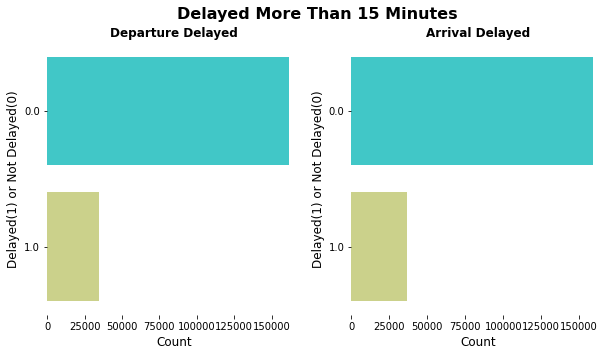

In [ ]:
plt.figure(figsize=(10, 5))

plt.suptitle('Delayed More Than 15 Minutes', weight='bold', fontsize=16)

ax1 = plt.subplot(1, 2, 1, frameon=False)
sns.countplot(y='DEP_DEL15', data=dataset, palette='rainbow', orient='v')
plt.title('Departure Delayed', weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Delayed(1) or Not Delayed(0)', fontsize=12)

ax2 = plt.subplot(1, 2, 2, frameon=False)
sns.countplot(y='ARR_DEL15', data=dataset, palette='rainbow', orient='v')
plt.title('Arrival Delayed', weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Delayed(1) or Not Delayed(0)', fontsize=12)

The result is basically the same so one feature could be selected as target. 

2. Correlations & Heatmap: 
*Corr()* could be used to compulate pairwise correlations. Heatmap helps with a direct visulations.    

In [ ]:
data.corr()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DISTANCE,DEP_DEL15
DAY_OF_MONTH,1.000000,-0.045752,0.007978,-0.003942,0.001591,-0.000750,0.004349,0.004513,0.000983
DAY_OF_WEEK,-0.045752,1.000000,0.010243,0.060690,0.007472,0.003731,0.001977,0.020943,-0.005165
OP_CARRIER_AIRLINE_ID,0.007978,0.010243,1.000000,0.447788,-0.047929,-0.052755,0.002232,-0.125850,0.010439
OP_CARRIER_FL_NUM,-0.003942,0.060690,0.447788,1.000000,-0.055581,-0.059478,0.005481,-0.346312,0.009943
ORIGIN_AIRPORT_ID,0.001591,0.007472,-0.047929,-0.055581,1.000000,0.018275,-0.027432,0.087790,-0.002818
DEST_AIRPORT_ID,-0.000750,0.003731,-0.052755,-0.059478,0.018275,1.000000,0.033554,0.090328,0.006502
DEP_TIME,0.004349,0.001977,0.002232,0.005481,-0.027432,0.033554,1.000000,-0.023357,0.192988
DISTANCE,0.004513,0.020943,-0.125850,-0.346312,0.087790,0.090328,-0.023357,1.000000,0.006444
DEP_DEL15,0.000983,-0.005165,0.010439,0.009943,-0.002818,0.006502,0.192988,0.006444,1.000000


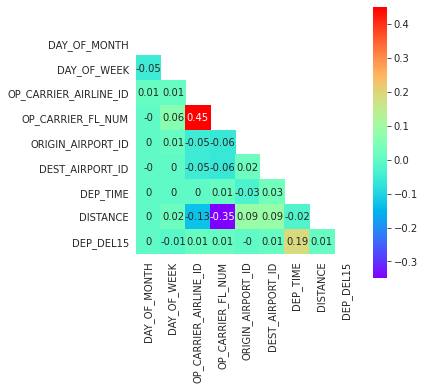

In [ ]:
plt.figure(figsize=(5,5))

mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(data.corr().round(2), mask=mask,
                     annot=True, cmap='rainbow', square=True)

**Answer**
* Which independent variables are significant?  

As shown above, the most causative features are '*DEP_TIME*'. 

3. Graphy for different time for each day   
Use violin graph to observe the pattern for which timeslot is the most possible one for the delay.   

Text(0, 0.5, 'Departure Time')

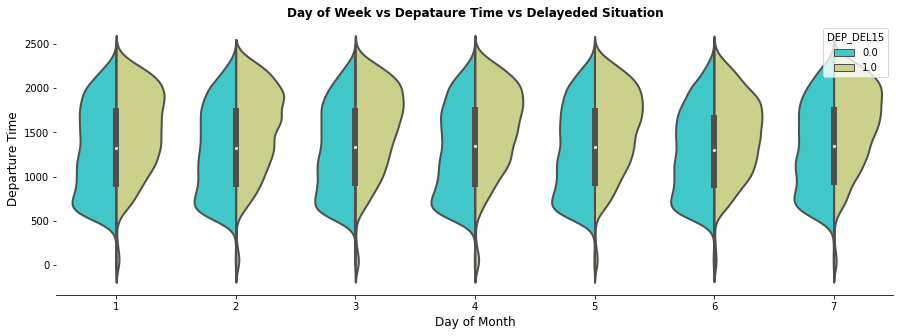

In [ ]:
plt.figure(figsize=(15,5))

sns.violinplot(x='DAY_OF_WEEK', y ='DEP_TIME', hue='DEP_DEL15', data=data, palette='rainbow', bw=.2,
               cut=2, linewidth=2, iner='box', split=True)
sns.despine(left=True)
plt.title('Day of Week vs Depataure Time vs Delayeded Situation', weight='bold')
plt.xlabel('Day of Month', fontsize=12)
plt.ylabel('Departure Time', fontsize=12)

20:00 has a greater chance for the delay. 

### **Data Predictions** 
As can be seen, the target feature of dataset is binary, with only values of 0 and 1. So when we are trying to consider the algorithms that suit this dataset, the ones inclined for discrete data should be selsected.     
Three algorithms would be used in this part: 
*   Logistic Regression
*   Random Forests 
*   K Neighbours Regression

\
First, split the train and test data. 
 


In [ ]:
data = data.iloc[:,:-1]
data

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DISTANCE
0,18,2,19393,2085,12889,14869,1415.0,368.0
1,24,7,20409,319,11697,14869,1827.0,2084.0
2,24,7,19790,1329,10397,14100,856.0,666.0
3,24,7,19790,2673,10397,11433,1109.0,594.0
4,24,7,20397,5044,11057,10431,1250.0,91.0
...,...,...,...,...,...,...,...,...
199995,14,4,19805,115,12953,13930,823.0,733.0
199996,22,5,19393,779,10821,13232,1416.0,611.0
199997,16,7,20436,1131,13485,13204,1046.0,1109.0
199998,24,1,20304,5155,12255,14877,2248.0,88.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, random_state=1)

print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print("Y train shape: ", Y_train.shape)
print("Y test shape: ", Y_test.shape)

X train shape:  (146871, 8)
X test shape:  (48957, 8)
Y train shape:  (146871, 1)
Y test shape:  (48957, 1)


#### - Logistic Regression

After test, hyperparameters like '*max_iter*', '*random_state*', '*solver*' barely have the optimization for the model. Here's the example for adjusting the '*solver*'. 

In [ ]:
from sklearn.linear_model import LogisticRegression

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scores = []
for i in solver: 
  lr = LogisticRegression(solver=i)
  lr.fit(X_train, Y_train)

  scores.append(lr.score(X_test, Y_test))

Text(0, 0.5, 'Score')

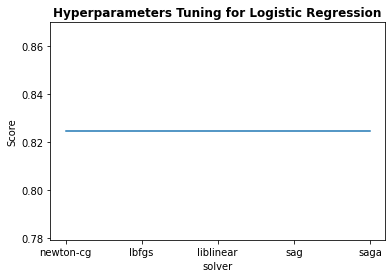

In [ ]:
plt.plot(solver, scores)
plt.title('Hyperparameters Tuning for Logistic Regression', weight='bold')
plt.xlabel('solver')
plt.ylabel('Score')

In [ ]:
scores

[0.8244786240986989,
 0.8244786240986989,
 0.8244786240986989,
 0.8244786240986989,
 0.8244786240986989]

In [ ]:
# lr = LogisticRegression(fit_intercept=True)
# lr.fit(X_train, Y_train)

# lr.score(X_test, Y_test)

0.8244786240986989

**Evaluation**

Try out the ROC AUC scoring method, which is seen great for a binary classification model. 



Probability of the prediction is mainly used for ROC AUC method. '*predict_proba()*' can be used to get it. And the result would be a list of probabilities for all classifications.   
In this case, it would fetch two probabilities for 0 and 1.   
'1' is wanted for the scoring representing as 'Delayed'. 

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

lr_probility = lr.predict_proba(X_test)

# Slice out the probaility
lr_score = roc_auc_score(Y_test, lr_probility[:, 1])
lr_score

0.6498021847343024

To get the AUC, plot the ROC curve. 

Text(0, 0.5, 'True Positive Rates')

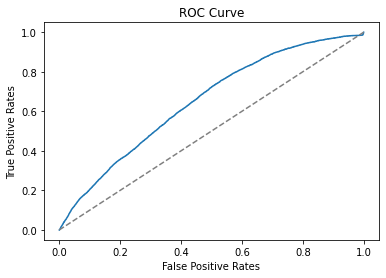

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, lr_probility[:, 1])
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'grey', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')

The ROC AUC score is less than default '*score()*', which returns the mean accuracy.   
But actually, these two thing doesn't mean the same tihng. One is possibility and another is accuracy. 



---
Other evalution methods: 

R2: R², represents the proportion of variance (of y) that has been explained by the independent variables in the model, the best possible score is 1.0.  

MSE: Mean Squared Error, the best value is 0.0.   
MAE: Mean Absolute Error, the best value is 0.0.

In [ ]:
lr_predict = lr.predict(X_test)
#R Squared
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, lr_predict)
print("r2 score: ", r2)

#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, lr_predict)
print("mse score: ", mse)

#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, lr_predict)
print("mae score: ", mae)

r2 score:  -0.21288772173223647
mse score:  0.17552137590130115
mae score:  0.17552137590130115


**Answers**  
* Is the relationship significant?  
Yes. 
* Are any model assumptions violated?  
No. 
* Is there any multicollinearity in the model?  
No.
* Does the model make sense?  
Yes. As presented above. 
* Does regularization help?  
Yes. This model uses a default regularization L2. 

* Which hyperparameters are important?  
In this model, adjusting hyperparameter doesn't really help. 
* Coding professionalism?  
Maybe. 

---
***As the part below, the explanation would be simplified for overlapping.**

#### - Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

scores_rf = []
# # Try different depth
for i in range(50):
  rf = RandomForestClassifier(max_depth=1, random_state=i)
  rf.fit(X_train, Y_train)

  score = rf.score(X_test, Y_test)
  scores_rf.append(score)

Text(0, 0.5, 'Score')

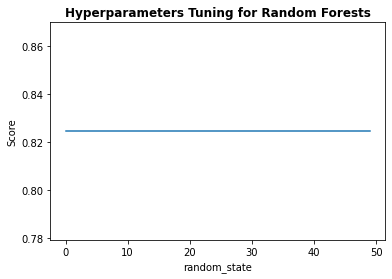

In [ ]:
plt.plot(range(50), scores_rf)
plt.title('Hyperparameters Tuning for Random Forests', weight='bold')
plt.xlabel('random_state')
plt.ylabel('Score')

*It is supposed to have differnet scores, as running on python but not this notebook..

In [ ]:
rf = RandomForestClassifier(max_depth=3, random_state=42)
rf.fit(X_train, Y_train)

rf.score(X_test, Y_test)

0.8244786240986989

**Evaluation**

In [ ]:
rf_probility = rf.predict_proba(X_test)

# Slice out the probaility
rf_score = roc_auc_score(Y_test, rf_probility[:, 1])
rf_score

0.6428330266839881

Text(0, 0.5, 'True Positive Rates')

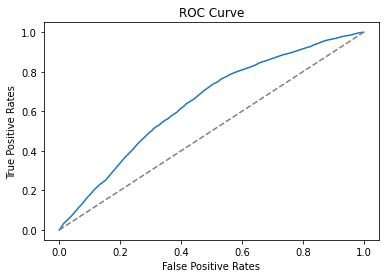

In [ ]:
fpr2, tpr2, thresholds2 = roc_curve(Y_test, rf_probility[:, 1])
plt.plot(fpr2, tpr2)
plt.plot([0,1], [0,1], 'grey', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')

---
Other evalution methods: 

In [ ]:
rf_predict = rf.predict(X_test)

r2_rf = r2_score(Y_test, rf_predict)
print("r2 score: ", r2_rf)

mse_rf = mean_squared_error(Y_test, rf_predict)
print("mse score: ", mse_rf)

mae_rf = mean_absolute_error(Y_test, rf_predict)
print("mae score: ", mae_rf)

r2 score:  -0.21288772173223647
mse score:  0.17552137590130115
mae score:  0.17552137590130115


**Answers**  
* Is the relationship significant?  
Yes.  
* Are any model assumptions violated?  
No. 
* Is there any multicollinearity in the model?  
No. 
* Does the model make sense?  
Yes. As presented above. 
* Does regularization help?  
Yes.  
* Which hyperparameters are important?  
Random_state should be important, while doesn't work in this notebook. 
* Coding professionalism?  
Maybe. 

#### - K Neighbours Regression

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

scores_kn = []
for i in range(1, 21): 
  kn = KNeighborsClassifier(n_neighbors=i)
  kn.fit(X_train, Y_train)
  scores_kn.append(kn.score(X_test, Y_test))

Text(0, 0.5, 'Score')

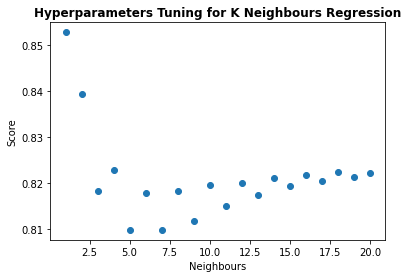

In [ ]:
plt.scatter(range(1, 21), scores_kn)
plt.title('Hyperparameters Tuning for K Neighbours Regression', weight='bold')
plt.xlabel('Neighbours')
plt.ylabel('Score')

In [ ]:
# Choose 1 as the best result:
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train, Y_train)
kn.score(X_test, Y_test)

0.852850460608289

**Evaluation**

In [ ]:
kn_probility = kn.predict_proba(X_test)

# Slice out the probaility
kn_score = roc_auc_score(Y_test, kn_probility[:, 1])
kn_score


0.6998090130885399

Text(0, 0.5, 'True Positive Rates')

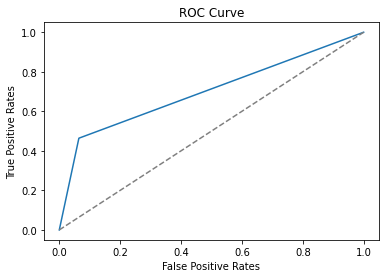

In [ ]:
fpr3, tpr3, thresholds3 = roc_curve(Y_test, kn_probility[:, 1])
plt.plot(fpr3, tpr3)
plt.plot([0,1], [0,1], 'grey', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')

---
Other evalution methods: 

In [ ]:
kn_predict = kn.predict(X_test)

r2_kn = r2_score(Y_test, kn_predict)
print("r2 score: ", r2_kn)

mse_kn = mean_squared_error(Y_test, kn_predict)
print("mse score: ", mse_kn)

mae_kn = mean_absolute_error(Y_test, kn_predict)
print("mae score: ", mae_kn)

r2 score:  -0.016832671634939178
mse score:  0.1471495393917111
mae score:  0.1471495393917111


**Answers**  
* Is the relationship significant?  
Yes.  
* Are any model assumptions violated?  
No. 
* Is there any multicollinearity in the model?  
No. 
* Does the model make sense?  
Yes. As presented above. 
* Does regularization help?  
Yes.  
* Which hyperparameters are important?  
It's '*n_neighbors*'. 
* Coding professionalism?  
Maybe. 

### **Conclusion**

The models could get a good result in scores for accuracy, mean scores or r2 scores, but generally can't get a higher result for ROC AUC score.  
Also, this dataset is limited for the correlations. The features share barely tight correlations, which lead a limited predictor.  
K Neighbours Regression model showed the best result. 

This project could, maybe,  get a better results for hyperparameters' adjustment in python but not ipynb. 